## Лабораторная работа 1.2.
## Исследование эффекта Комптона.

**Описание: **

1) С помощью сцинтилляционного спектрометра исследуется энергетический спектр $\gamma$-квантов, рассеянных на графите.

2) Определяется энергия рассеянных $\gamma$-квантов в зависимости от угла рассеяния, а также энергия покоя частиц, на которых происходит комптоновское рассеяние.

***Немного теории:***

$\Large \frac{1}{N(\theta)}$ - $\Large \frac{1}{N(\theta)}$ = $ A(1-cos\theta)$

где $N(\theta)$ - номер канала, который соответствует энергии кванта, испытавшего комптоновское рассеяние на угол $\theta$

A - неизвестный коэффициент пропорциональности между $\epsilon (\theta)$ и $N(\theta)$

При $\theta$=$90^o$ формула принимает вид: $\Large mc^2(\frac{1}{E(90)}-\frac{1}{E(0)})=1$

или: $\Large mc^2=E(0) \frac{E(90)}{E(0)-E(90)} = E_{\gamma} \frac{N(90)}{N(0)-N(90)}$ (4)

где в формулу (4) лучше подставить $N_{наил} (0)$ и $N_{наил} (90)$, полученные с помощью графика.

$E(0)=E_{\gamma}$ - энергия электронов, рассеянных вперед - равна энергии $\gamma$-лучей, испускаемых источником (в нашем случае $^{137}Cs$). 

Здесь $E(0)=E_{\gamma}=662$ кэВ.

***Обработка результатов:***

* Положения фотопиков для каждого значения угла $\theta$:

In [21]:
import numpy as np
thetaC=np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])#, 120])
theta=thetaC*np.pi/180
N=[741, 744, 695, 613, 565, 496, 432, 388, 346, 304, 282, 273]#, 241]
N_errs=[20, 60, 47, 49, 37, 60, 20, 47, 33, 40, 33, 37]#, 75]

* Построим график, откладывая по оси абсцисс величину $1-cos\theta$, а по оси ординат величину 1/N($\theta$) и ее ошибку. Проведем через полученные точки наилучшую прямую.

$\Delta (\frac{1}{N}) = \frac{\Delta N}{N}$

In [22]:
N_inv=[1/n for n in N]
err_N_inv=[]
for i in range(len(N)):
    err_N_inv.append(N_errs[i]/N[i]**2)

import numpy as np
coss=[(1-np.cos(t)) for t in theta]

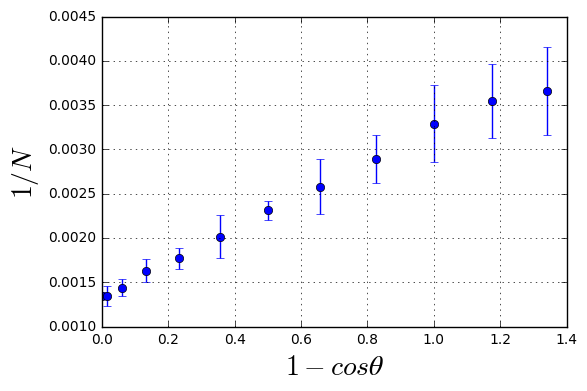

In [23]:
import numpy as np
import matplotlib.pyplot as plt
x=[0]
y=[0]

plt.errorbar(coss,N_inv, yerr=err_N_inv, fmt='bo') 
#plt.plot(x,y,'w-',coss,N_inv,'bo')
plt.xlabel('$1-cosθ$',size=20)
plt.ylabel('$1/N$',size=20)

#Легенда
#plt.text(0.7,1600,'T=30 C',size=14)


plt.grid()
plt.show()

In [24]:
def linearfunc_koeff(x1, y1):
    sumxy=0
    sumx2=0
    sumy2=0
    sumx=0
    sumy=0
    
    n=len(x1)

    for x,y in zip(x1, y1):
        sumx+=x
        sumy+=y
        sumxy+=x*y
        sumx2+=x**2
        sumy2+=y**2

    sr_xy=sumxy/n
    sr_x2=sumx2/n
    sr_y2=sumy2/n
    srx=sumx/n
    sry=sumy/n

    b=(sr_xy-srx*sry)/(sr_x2-srx**2)
    sigmab=(1/n**0.5)*((sr_y2-sry**2)/(sr_x2-srx**2)-b**2)**0.5
    a=sry-b*srx
    sigmaa=sigmab*(sr_x2-srx**2)**0.5
    
    return (b, sigmab, a, sigmaa) #y=a+bx

In [26]:
b, sigmab, a, sigmaa = linearfunc_koeff(coss, N_inv)

print('1/N ={:.3} + {:.3} * (1-cosθ)'.format(a,b))
print(a,b)
print('{:.3}, {:.3}'.format(sigmaa, sigmab))

1/N =0.00136 + 0.00183 * (1-cosθ)
0.00136042938027 0.00182609265732
1.68e-05, 3.73e-05


* Получаем аппроксимацию:

$\frac {1}{N} = a + b(1-cosθ)$

a = 0.001356 $\pm$ 0.000016

b = 0.00184 $\pm$ 0.00003


* Определим энергию покоя частицы, на которой происходит комптоновское рассеяние первичных $\gamma$-квантов.

$ mc^2= E_{\gamma} \frac{N(90)}{N(0)-N(90)}$

И подставим $N_{наил} (0)$ и $N_{наил} (90)$, полученные с помощью графика.

$\Large N = \frac{1}{a + b(1-cosθ)}$

$\Large \Delta N = \sqrt {N^4 (\Delta a)^2 + N^4(1-cosθ)^2 (\Delta b)^2} $

In [30]:
N_0=1/0.00136
N_90=1/(0.00136+0.00183*1)

sigmaN_0=np.sqrt( sigmaa**2*N_0**4 )
sigmaN_90=np.sqrt( sigmaa**2*N_90**4 + sigmab**2*N_90**4 )

print(N_0, N_90)
print(sigmaN_0, sigmaN_90)

735.2941176470588 313.4796238244514
9.09938795268 4.0232725718


In [31]:
mc2=662*313/(735-313) #в кэВ
print(mc2)

491.0094786729858


По размерам величин видно, что погрешность $mc^2$ будет определяться в основном $\Delta N(90)$

$\Large \Delta (mc^2) = E_{\gamma} \frac{N(0)}{(N(0)-N(90))^2} \Delta N(90)$

In [32]:
sigma_mc2=662*735*9.09938795268/(735-313)**2 #в кэВ
print(sigma_mc2)

24.861802273845534


* Итак, получилось значение $mc^2$=489 кэВ .

Вопросы

излучение Хокинга

прохождение гамма квантов через вещество